# 初始化

初始化一些库，创建一个保存图像的函数。

这个函数以后可能会经常使用，回头注意看看！  

2020.11.14

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):  # 这个保存图像的函数不错，回头注意学习
    path = r'C:\Users\86181\Desktop\Access to CS\ML\sklearn and tensorflow\generated_image' + '\\' + fig_id + '.png'
    #os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    print("Saving figure", fig_id)
    


# MNIST

**警告**：从``Scikit-Learn 0.20``开始不推荐使用``fetch_mldata（）``。 您应该改用``fetch_openml（）``。 但是，它返回未排序的``MNIST``数据集，而``fetch_mldata（）``返回按目标排序的数据集（训练集和测试测试分别排序）。 通常，这很好，但是如果要获得与以前完全相同的结果，则需要使用以下函数对数据集进行排序：

In [2]:
# 这是原书提供的函数，但是在中国无法执行
'''
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]
'''

'\ndef sort_by_target(mnist):\n    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]\n    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]\n    mnist.data[:60000] = mnist.data[reorder_train]\n    mnist.target[:60000] = mnist.target[reorder_train]\n    mnist.data[60000:] = mnist.data[reorder_test + 60000]\n    mnist.target[60000:] = mnist.target[reorder_test + 60000]\n'

In [3]:
import pandas as pd
mnist = pd.read_csv(r'C:\Users\86181\Downloads\mnist_784.csv')
mnist

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [4]:
mnist.sort_values(by='class', inplace=True) # 没有这个inplace的话会创建一个副本，就传不回原变量中
mnist['class']

34999    0
56424    0
56419    0
16705    0
56415    0
        ..
13687    9
42651    9
58914    9
13678    9
58529    9
Name: class, Length: 70000, dtype: int64

In [5]:
y = mnist['class'].copy().values
x = mnist.drop('class', axis=1)
X = x.values
y

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

Saving figure some_digit_plot


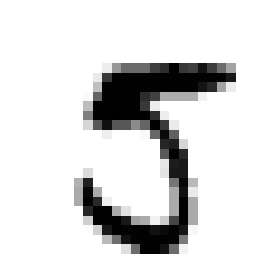

In [6]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis("off")
save_fig("some_digit_plot")
plt.show()

In [7]:
# 从以上的代码，我们可以定义一个画图 + 保存的函数
def save_and_show_figure(digit, image_name):
    digit_reshaped = digit.reshape(28,28)
    plt.imshow(digit_reshaped, cmap=mpl.cm.binary, interpolation='nearest')
    plt.axis('off')
    save_fig(image_name)
    plt.show()

Saving figure random_selected_image


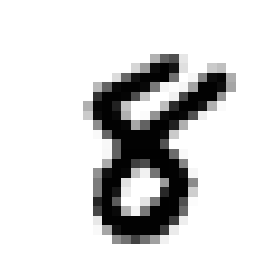

In [8]:
save_and_show_figure(X[58762], 'random_selected_image')

In [9]:
y[58762]

8

In [10]:
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
shuffle_index = np.random.permutation(60000) # 在[0,60000]中随机选择列表的排列顺序
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
y_train_5

array([False,  True,  True, ..., False, False, False])

In [13]:
from sklearn.linear_model import SGDClassifier

sgc_clf = SGDClassifier(random_state=42)
sgc_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [14]:
# 验证之前的5的图片

sgc_clf.predict([some_digit])

array([ True])

In [15]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgc_clf, x_train, y_train_5, cv=5, scoring='accuracy')

array([0.938     , 0.96941667, 0.96566667, 0.94783333, 0.9565    ])

In [16]:
score = np.mean([0.96408333, 0.96083333, 0.95991667, 0.964     , 0.95241667])
print('这次交叉验证的平均正确率为:{:.2f}%'.format(score*100))

这次交叉验证的平均正确率为:96.03%


## 对性能的评估

在交叉验证过程中，有时候你会需要更多的控制权，相较于函数`cross_val_score()`或者其他相似函数所提供的功能。这种情况下，你可以实现你自己版本的交叉验证。事实上它相当简单。以下代码粗略地做了和`cross_val_score()`相同的事情，并且输出相同的结果。

**个人跳过了这块，感觉没什么意思**

现在我们定义一个非常简单的分类器，它的功能是：全部预测为不是5

In [17]:
# 制造了一个只会说 False 的预测器
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, x, y = None):
        pass
    def predict(self, x):
        return np.zeros((len(x), 1), dtype = bool)

In [18]:
never5 = Never5Classifier()
scores = np.mean(cross_val_score(never5, x_train, y_train_5, cv=5, scoring='accuracy'))
print('这个笨笨的预测器的预测准确率为:{:.2f}%'.format(scores*100))

这个笨笨的预测器的预测准确率为:89.48%


## 混淆矩阵

对分类器来说，一个好得多的性能评估指标是混淆矩阵。大体思路是：输出类别A被分类成类别 B 的次数。举个例子，为了知道分类器将 5 误分为 3 的次数，你需要查看混淆矩阵的第五行第三列。

为了计算混淆矩阵，首先你需要有一系列的预测值，这样才能将预测值与真实值做比较。你或许想在测试集上做预测。但是我们现在先不碰它。（记住，只有当你处于项目的尾声，当你准备上线一个分类器的时候，你才应该使用测试集）。相反，你应该使用`cross_val_predict()`函数

In [19]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgc_clf, x_train, y_train_5, cv=3)
y_train_pred

array([False,  True,  True, ...,  True, False, False])

就像 `cross_val_score()`，`cross_val_predict()`也使用 K 折交叉验证。它不是返回一个评估分数，而是返回基于每一个测试折做出的一个***预测值***。这意味着，对于每一个训练集的样例，你得到一个干净的预测（“干净”是说一个模型在训练过程当中没有用到测试集的数据）。

现在使用 `confusion_matrix()`函数，你将会得到一个混淆矩阵。传递目标类(`y_train_5`)和预测类（`y_train_pred`）给它。

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[51707,  1980],
       [  999,  5314]], dtype=int64)

混淆矩阵中的每一行表示一个实际的类, 而每一列表示一个预测的类。该矩阵的第一行认为“非 5”（反例）中的 53272 张被正确归类为 “非 5”（他们被称为真反例，true negatives）, 而其余 1307 被错误归类为"是 5" （假正例，false positives）。第二行认为“是 5” （正例）中的 1077 被错误地归类为“非 5”（假反例，false negatives），其余 4344 正确分类为 “是 5”类（真正例，true positives）。一个完美的分类器将只有真反例和真正例，所以混淆矩阵的非零值仅在其主对角线（左上至右下）。啊

也就是说，横轴表示实际，纵轴表示预测，混淆矩阵：
（【预测正确】实际假，预测假），（【预测错误】实际假，预测真）
（【预测错误】实际真，预测假），（【预测正确】实际真，预测真）

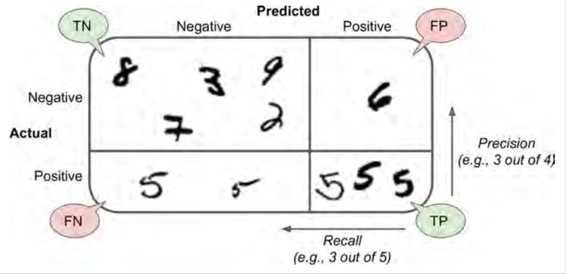

# 准确率（precision）与召回率(recall)

**准确率**：真正/所有预测为正个数.（预测为正中实际为正的概率) <br>
**召回率**：真正/所有实际为正的个数 （实际为正中预测为正的概率）

In [21]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)
# 也就是说，如果预测器预测它是 5， 只有87.0%的概率是正确的

0.7285440087743351

In [22]:
4540 / (4540 + 676)

0.870398773006135

In [23]:
recall_score(y_train_5, y_train_pred)
# 也就是说，如果实际上图片就是5， 只有71.9%的概率被预测正确

0.8417551085062569

In [24]:
4540 / (4540 + 1773)

0.7191509583399335

通常结合准确率和召回率会更加方便，这个指标叫做“F1 值”，特别是当你需要一个简单的方法去比较两个分类器的优劣的时候。F1 值是准确率和召回率的调和平均。普通的平均值平等地看待所有的值，而调和平均会给小的值更大的权重。所以，要想分类器得到一个高的 F1 值，需要召回率和准确率同时高。

下图是F1值的公式，为了方便起见，sklearn内置了其计算方式

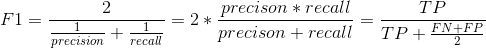

In [25]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7810685676490042

F1 支持那些有着相近准确率和召回率的分类器。这不会总是你想要的。有的场景你会绝大程度地关心准确率，而另外一些场景你会更关心召回率。举例子，如果你训练一个分类器去检测视频是否适合儿童观看，你会倾向选择那种即便拒绝了很多好视频、但保证所保留的视频都是好（高准确率）的分类器，而不是那种高召回率、但让坏视频混入的分类器（这种情况下你或许想增加人工去检测分类器选择出来的视频）。另一方面，加入你训练一个分类器去检测监控图像当中的窃贼，有着 30% 准确率、99% 召回率的分类器或许是合适的（当然，警卫会得到一些错误的报警，但是几乎所有的窃贼都会被抓到）。

不幸的是，你不能同时拥有两者。增加准确率会降低召回率，反之亦然。这叫做准确率与召回率之间的折衷。

## 准确率/召回率之间的折衷

为了弄懂这个折衷，我们看一下`SGDClassifier`是如何做分类决策的。对于每个样例，它根据决策函数计算分数,如果这个分数大于一个阈值，它会将样例分配给正例，否则它将分配给反例。图 3-3 显示了几个数字从左边的最低分数排到右边的最高分。假设决策阈值位于中间的箭头（介于两个 5 之间）：您将发现4个真正例（数字 5）和一个假正例（数字 6）在该阈值的右侧。因此,使用该阈值,准确率为 80%（4/5）。但实际有 6 个数字 5，分类器只检测 4 个, 所以召回是 67% （4/6）。现在，如果你
提高阈值（移动到右侧的箭头），假正例（数字 6）成为一个真反例，从而提高准确率（在这种情况下高达 100%），但一个真正例 变成假反例，召回率降低到 50%。相反，降低阈值可提高召回率、降低准确率。

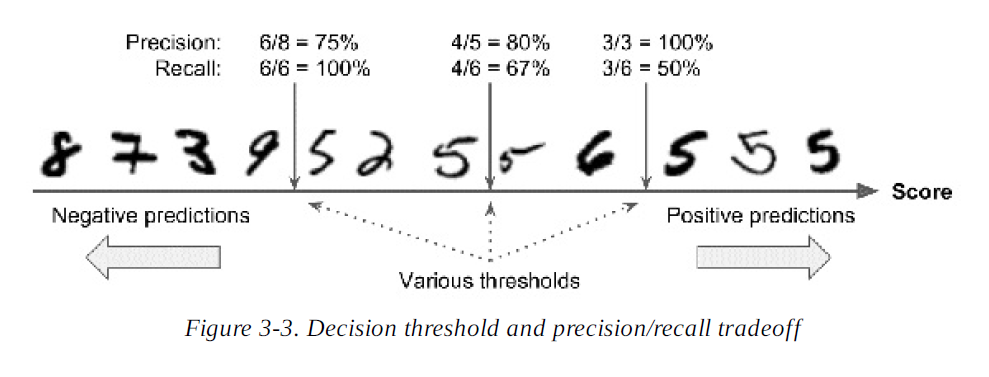

Scikit-Learn 不让你直接设置阈值，但是它给你提供了设置决策分数的方法，这个决策分数可以用来产生预测。它不是调用分类器的`predict()`方法，而是调用`decision_function()`方法。这个方法返回每一个样例的分数值，然后基于这个分数值，使用你想要的任何阈值做出预测。

In [26]:
y_some_digit_score = sgc_clf.decision_function([some_digit])
y_some_digit_score

array([7721.52007643])

In [27]:
threshold = 10000
y_some_digit_pred = (y_some_digit_score > threshold)
y_some_digit_pred # 如果阈值小于7721，那自然就是True了

array([False])

In [28]:
y_scores = cross_val_predict(sgc_clf, x_train, y_train_5, 
                           cv=3, method='decision_function')

In [29]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
thresholds

array([-103982.45000644, -103380.82081546, -102436.63431936, ...,
         37543.71701437,   38991.09884401,   40668.17482322])

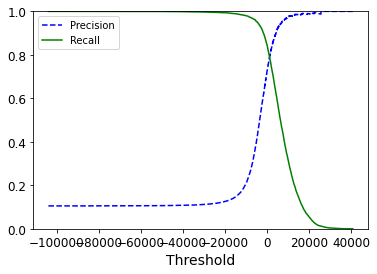

In [30]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") # x
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

你也许会好奇为什么准确率曲线比召回率曲线更加起伏不平。原因是准确率有时候会降低，尽管当你提高阈值的时候，通常来说准确率会随之提高。回头看图 3-3，留意当你从中间箭头开始然后向右移动一个数字会发生什么： 准确率会由 4/5（80%）降到 3/4（75%）。另一方面，当阈值提高时候，召回率只会降低。这也就说明了为什么召回率的曲线更加平滑

现在你可以选择适合你任务的最佳阈值。另一个选出好的准确率/召回率折衷的方法是直接画出准确率对召回率的曲线，如图 3-5 所示。

Saving figure Precision Rate vs Recall Rate


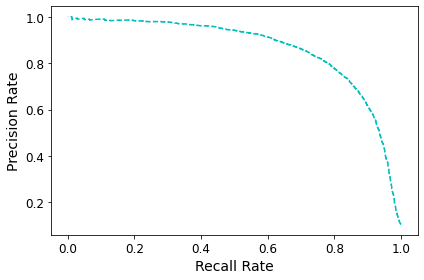

In [31]:
plt.plot(recalls, precisions, 'c--')
plt.xlabel('Recall Rate')
plt.ylabel('Precision Rate')
save_fig('Precision Rate vs Recall Rate')
# 这张图应该越往右上偏越好，这个图说明还有一些改进的空间

In [32]:
# 调整阈值，使准确率达到90%
# 4184 是90%的分界线
# 7000 似乎是一个比较好的95%准确率的阈值
y_train_pred_90 = (y_scores > 4184)
precision_score(y_train_5, y_train_pred_90)

0.9003664681630783

## ROC 曲线

受试者工作特征（ROC）曲线是另一个二分类器常用的工具。它非常类似与准确率/召回率曲线，但不是画出准确率对召回率的曲线，ROC 曲线是真正例率（true positive rate，另一个名字叫做召回率）对假正例率（false positive rate, FPR）的曲线。FPR 是反例被错误分成正例的比率。它等于 1 减去真反例率（true negative rate， TNR）。TNR是反例被正确分类的比率。TNR也叫做特异性。所以 ROC 曲线画出召回率对（1 减特异性）的曲线。

为了画出 ROC 曲线，你首先需要计算各种不同阈值下的 TPR、FPR，使用`roc_curve()`函数：

In [33]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
tpr

array([0.00000000e+00, 1.58403295e-04, 1.23554570e-02, ...,
       9.99841597e-01, 1.00000000e+00, 1.00000000e+00])

In [34]:
def plot_roc_cur(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label) # 蓝色线
    plt.plot([0,1], [0,1], 'k--') # 黑色虚线
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

Saving figure roc_curve


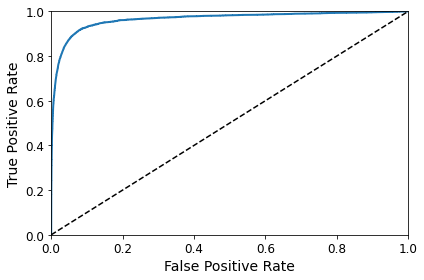

In [35]:
plot_roc_cur(fpr, tpr)
save_fig('roc_curve')

这里同样存在折衷的问题：召回率（TPR）越高，分类器就会产生越多的假正例（FPR）。图中的点线是一个完全随机的分类器生成的 ROC 曲线；一个好的分类器的 ROC 曲线应该尽可能远离这条线（即向左上角方向靠拢）。

一个比较分类器之间优劣的方法是：测量ROC曲线下的面积（AUC）。一个完美的分类器的 ROC AUC 等于 1，而一个纯随机分类器的 ROC AUC 等于 0.5。Scikit-Learn 提供了一个函数来计算 ROC AUC：

In [36]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9651796500694277

因为 ROC 曲线跟准确率/召回率曲线（或者叫 PR）很类似，你或许会好奇如何决定使用哪一个曲线呢？一个笨拙的规则是，**优先使用 PR 曲线当正例很少，或者当你关注假正例多于假反例的时候。其他情况使用 ROC 曲线。**举例子，回顾前面的 ROC 曲线和 ROC AUC 数值，你或许认为这个分类器很棒。但是这几乎全是因为只有少数正例（“是 5”），而大部分是反例（“非 5”）。相反，PR 曲线清楚显示出这个分类器还有很大的改善空间（PR 曲线应该尽可能地靠近右上角）。


让我们训练一个`RandomForestClassifier`，然后拿它的的ROC曲线和ROC AUC数值去跟`SGDClassifier`的比较。首先你需要得到训练集每个样例的数值。但是由于随机森林分类器的工作方式，`RandomForestClassifier`不提供`decision_function()`方法。相反，它提供了`predict_proba()`方法。Skikit-Learn分类器通常二者中的一个。`predict_proba()`方法返回一个数组，数组的每一行代表一个样例，每一列代表一个类。数组当中的值的意思是：给定一个样例属于给定类的概率。比如，70%的概率这幅图是数字 5。

In [37]:
from sklearn.ensemble import RandomForestClassifier

rdfclf = RandomForestClassifier(random_state=42)
y_rdf_pred = cross_val_predict(rdfclf, x_train, y_train_5, cv=3, method='predict_proba')
y_rdf_pred

array([[0.98, 0.02],
       [0.31, 0.69],
       [0.5 , 0.5 ],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.98, 0.02]])

In [38]:
y_scores_forest = y_rdf_pred[:, 1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

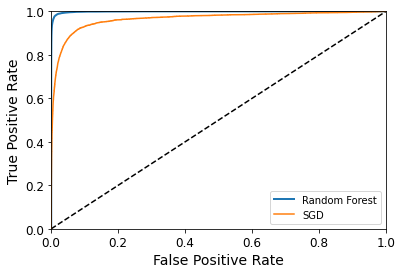

In [39]:
plot_roc_cur(fpr_forest, tpr_forest, 'Random Forest')
plt.plot(fpr, tpr, label = 'SGD')
plt.legend(loc = 'best')

In [40]:
roc_auc_score(y_train_5, y_scores_forest)

0.9987816073059316

# 多类分类

二分类器只能区分两个类，而多类分类器（也被叫做多项式分类器）可以区分多于两个类。

一些算法（比如随机森林分类器或者朴素贝叶斯分类器）可以直接处理多类分类问题。其他一些算法（比如 SVM 分类器或者线性分类器）则是严格的二分类器。然后，有许多策略可以让你用二分类器去执行多类分类。

举例子，创建一个可以将图片分成 10 类（从 0 到 9）的系统的一个方法是：训练10个二分类器，每一个对应一个数字（探测器 0，探测器 1，探测器 2，以此类推）。然后当你想对某张图片进行分类的时候，让每一个分类器对这个图片进行分类，选出决策分数最高的那个分类器。这叫做“一对所有”（OvA）策略（也被叫做“一对其他”）。

另一个策略是对每一对数字都训练一个二分类器：一个分类器用来处理数字 0 和数字 1，一个用来处理数字 0 和数字 2，一个用来处理数字 1 和 2，以此类推。这叫做“一对一”（OvO）策略。如果有 N 个类。你需要训练`N*(N-1)/2`个分类器。对于 MNIST 问题，需要训练 45 个二分类器！当你想对一张图片进行分类，你必须将这张图片跑在全部45个二分类器上。然后看哪个类胜出。OvO 策略的主要优点是：**每个分类器只需要在训练集的部分数据上面进行训练。这部分数据是它所需要区分的那两个类对应的数据。**

一些算法（比如 SVM 分类器）在训练集的大小上很难扩展，所以对于这些算法，OvO 是比较好的，因为它可以在小的数据集上面可以更多地训练，较之于巨大的数据集而言。但是，对于大部分的二分类器来说，OvA 是更好的选择。

Scikit-Learn 可以探测出你想使用一个二分类器去完成多分类的任务，它会自动地执行 OvA（除了 SVM 分类器，它使用 OvO）。让我们试一下`SGDClassifier`.

In [41]:
sgc_clf.fit(x_train, y_train)

AttributeError: 'SGDClassifier' object has no attribute 'predicte'

In [45]:
some_digit_score = sgc_clf.decision_function([some_digit])
some_digit_score

array([[-22752.1369464 , -39812.94670531, -14309.77745418,
         -6084.19503506, -29731.05360239,    564.76806203,
        -42260.13644364,  -2307.53630675,  -2778.86870064]])

In [46]:
rdfclf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
some_digit_score = rdfclf.predict_proba([some_digit]) # 随机森林的这个predict_proba计算的是每个类型的概率
some_digit_score

array([[0.02, 0.  , 0.01, 0.06, 0.  , 0.88, 0.  , 0.02, 0.01]])

In [51]:
cross_val_score(sgc_clf, x_train, y_train, cv=3, scoring='accuracy')
# 这个产出的数值非常接近，说明交叉实验是成功的，结果是稳健的robust

array([0.87395, 0.8903 , 0.8882 ])

In [41]:
# 正则化用processing

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))

In [53]:
cross_val_score(sgc_clf, x_train_scaled, y_train, cv=3, scoring='accuracy')
# 对比上面，可以看出有了很大改进

array([0.9277 , 0.92835, 0.9297 ])

In [54]:
rdfclf.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [55]:
some_digit_score = rdfclf.predict_proba([some_digit]) 
some_digit_score # 对比上面的概率来看，正则化对随机森林的效果并不太好

array([[0.13, 0.  , 0.12, 0.14, 0.04, 0.23, 0.08, 0.03, 0.23]])

# 误差分析

当然，如果这是一个实际的项目，你会在你的机器学习项目当中，跟随以下步骤（见附录 B）：探索准备数据的候选方案，尝试多种模型，把最好的几个模型列为入围名单，用`GridSearchCV`调试超参数，尽可能地自动化，像你前面的章节做的那样。在这里，我们假设你已经找到一个不错的模型，你试图找到方法去改善它。一个方式是分析模型产生的误差的类型。

首先，你可以检查混淆矩阵。你需要使用`cross_val_predict()`做出预测，然后调用`confusion_matrix()`函数，像你早前做的那样。

In [42]:
y_train_pred = cross_val_predict(sgc_clf, x_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred) # 混淆矩阵(actual value, predicted value)
conf_mx

array([[6641,    1,   48,   26,   10,   96,   41,   10,   30],
       [   2, 7616,   66,   31,    8,   62,    8,   10,   74],
       [  32,   33, 6374,  132,   96,   55,   79,   60,  129],
       [  25,   24,  161, 6414,    9,  283,   32,   82,  111],
       [  12,   33,   83,   31, 6457,   35,   46,   50,   77],
       [  39,   24,   59,  217,   73, 5657,   97,   36,  111],
       [  34,   24,   90,    6,   48,  144, 6490,    7,   33],
       [  28,   23,   96,   57,   67,   33,    4, 6966,   19],
       [  34,   79,   90,  178,   11,  231,   33,   27, 3100]],
      dtype=int64)

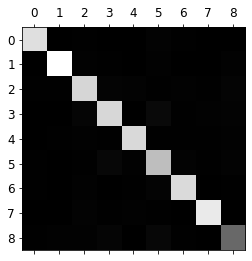

In [43]:
plt.matshow(conf_mx, cmap=plt.cm.gray) # cmap: color map

这个混淆矩阵看起来相当好，因为大多数的图片在主对角线上。在主对角线上意味着被分类正确。数字 5 对应的格子看起来比其他数字要暗淡许多。这可能是数据集当中数字 5 的图片比较少，又或者是分类器对于数字 5 的表现不如其他数字那么好。你可以验证两种情况。

让我们关注仅包含误差数据的图像呈现。首先你需要将混淆矩阵的每一个值除以相应类别的图片的总数目。这样子，你可以比较错误率，而不是绝对的错误数（因为这对大的类别不公平）。

然后，再用 0 来填充对角线。这样子就只保留了被错误分类的数据。让我们画出这个结果。

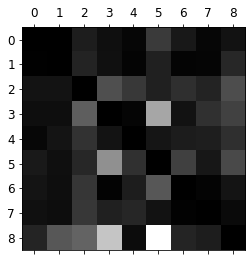

In [49]:
row_sums = conf_mx.sum(axis=1, keepdims=True) # axis=1，计算每行之和
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray) # 越亮的地方，被误分类的就越多
# 从这个结果来看，8是被误分类的最多的，且8经常被误分类为5（好吧，勉强有点像...）

回顾这幅图，看样子你应该努力改善分类器在数字 8的表现，和纠正 8/5 的混淆。举例子，你可以尝试去收集更多的数据，或者你可以构造新的、有助于分类器的特征。举例子，写一个算法去数闭合的环（比如，数字 8 有两个环，数字 6 有一个， 5 没有）。又或者你可以预处理图片（比如，使用 Scikit-Learn，Pillow， OpenCV）去构造一个模式，比如闭合的环。

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from collections import defaultdict
neighbors = [5,6,7,8,9,10]
weights = ['uniform','distance']
record = np.array([[0]*len(weights) for _ in neighbors])
record

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])

In [64]:
for i in neighbors:   
    for j in range(len(weights)):
        knn_clf = KNeighborsClassifier(n_neighbors = i, weights = weights[j], n_jobs=6)
        knn_scores = cross_val_score(knn_clf, x_train_scaled, y_train, cv=2, scoring='accuracy')
        record[i-5][j] = np.mean(knn_scores)
print(record)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [66]:
record1 = np.random.randint(5, high=10, size=(3,5))
record1

array([[9, 8, 6, 9, 5],
       [6, 9, 8, 9, 9],
       [7, 6, 9, 5, 5]])

In [67]:
np.mean(record1, axis=1)

array([7.4, 8.2, 6.4])

In [81]:
knn_clf = KNeighborsClassifier(n_neighbors=6, n_jobs=7)

In [82]:
y_knn_pred = cross_val_predict(knn_clf, x_train_scaled, y_train, cv=3)
right_rate = (y_train == y_knn_pred)
right = np.sum(right_rate)/ len(right_rate)
print('n_neighbor = 6 时，正确率为{:.2f}%'.format(right*100))

n_neighbor = 8 时，正确率为95.25%


In [77]:
right_rate = (y_train == y_knn_pred)
right = np.sum(right_rate)/ len(right_rate)
print('n_neighbor = 10 时，正确率为{:.2f}%'.format(right*100))

n_neighbor = 10 时，正确率为95.35%
